In [4]:
import numpy as np
from blimpy import Waterfall
import pandas as pd 

# WIDTH_BIN = 2048
WIDTH_BIN = 4096
# train 1
# target = 'HIP8497'
# train 2
# target = 'HIP110750'
# target 3
# target = 'HIP13402'
# test
# target = 'HIP15638'
# target = 'HIP83043'
# f_start, f_stop = 1418.701171875, 1587.890625
f_start, f_stop =1023.9257812499999,1193.115234375
resolution = 2.835503418452676e-06

# df =pd.read_csv('../GBT_pipeline/result/HIP91971_directory_5.csv')
df =pd.read_csv('../GBT_pipeline/result/'+target +'_directory.csv')
name = df['0'].tolist()

# loaded_data = np.zeros((6,16,1,60555264))
# loaded_data = np.zeros((6,16,1,59668224))

for i in range(6):
    loaded_data[i,:,:,:] =  Waterfall(name[i],f_start=f_start, f_stop=f_stop).data

print(loaded_data.shape)
num_samples = int((f_stop-f_start)//resolution//WIDTH_BIN)

(6, 16, 1, 59668224)


In [15]:
# [1023.9257812499999, 1080.322265625], [1080.322265625, 1136.71875], [1136.71875, 1193.115234375], [1193.115234375, 1249.51171875], [1249.51171875, 1305.908203125], [130
# 5.908203125, 1362.3046875], [1362.3046875, 1418.701171875], [1418.701171875, 1475.09765625], [1475.09765625, 1531.494140625], [1531.494140625, 1587.890625], [1587.890625
# , 1644.287109375], [1644.287109375, 1700.68359375], [1700.68359375, 1757.080078125], [1757.080078125, 1813.4765625], [1813.4765625, 1869.873046875], [1869.873046875, 192
# 6.26953125]
# /home/pma/peterma-ml/BL-Reservoir/development_env/F-Engine_Search/test_bench

In [5]:
final_set = np.zeros((num_samples,6, 16,WIDTH_BIN))
for i in range(num_samples):
    final_set[i,:,:,:] = loaded_data[:,:,0,i*(WIDTH_BIN):(i+1)*WIDTH_BIN]

In [6]:
print(final_set[:].shape)
print(final_set.shape[0]//3)

(14567, 6, 16, 4096)
4855


In [7]:
np.save('../../../../../../../datax/scratch/pma/real_filtered_LARGE_test_offband_'+target+'.npy', final_set[:])

In [8]:
print('../../../../../../../datax/scratch/pma/real_filtered_LARGE_test_offband_'+target+'.npy')

../../../../../../../datax/scratch/pma/real_filtered_LARGE_test_offband_HIP83043.npy


In [12]:
CORES = 39
interval = final_set.shape[0]//CORES 
for k in range(CORES):
    np.save('../../../../../../../datax/scratch/pma/real_filtered/'+str(k)+ '.npy', final_set[interval*i: (i+1)*(interval)])

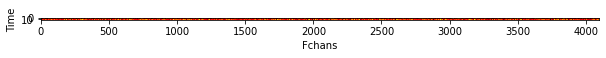

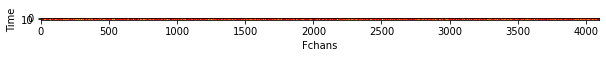

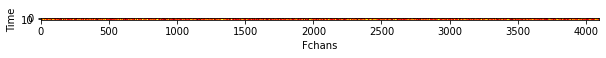

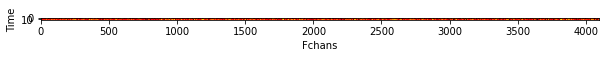

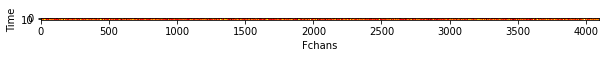

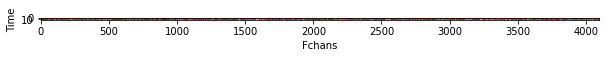

In [12]:
import matplotlib.pyplot as plt 
from random import random

%matplotlib inline
for i in range(6):
    plt.figure(figsize=(10,8))
    plt.xlabel("Fchans")
    plt.ylabel("Time")
    plt.imshow(final_set[int(random()*9711),i,:,:], interpolation='nearest', cmap=plt.get_cmap('hot'))
    plt.show()